In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [16]:
df = pd.read_excel("usffab_alum.xlsx", sheet_name=0, index_col=0)
df.index.name=None
df.columns= ['sales']
print(df.head())
buf = df

                 sales
2014-02-28   980329.54
2014-03-31  1447433.34
2014-04-30  1085004.78
2014-05-31   955848.69
2014-06-30   936224.20


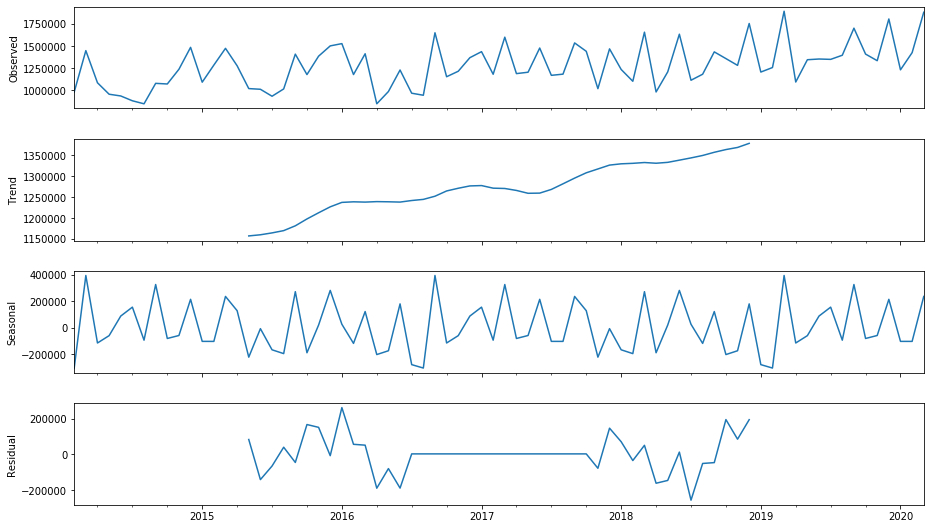

In [18]:
res = sm.tsa.seasonal_decompose(df.sales.dropna(),freq=30)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [19]:
#train_test_split
tr_start,tr_end = '2014-01-31','2019-03-31'
te_start,te_end = '2019-04-30','2020-03-31'
tra = buf['sales'][tr_start:tr_end].dropna()
tes = buf['sales'][te_start:te_end].dropna()

In [20]:
res = sm.tsa.adfuller(buf['sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.47707996424394716


In [21]:
res = sm.tsa.adfuller(buf['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:3.9564494716626295e-07


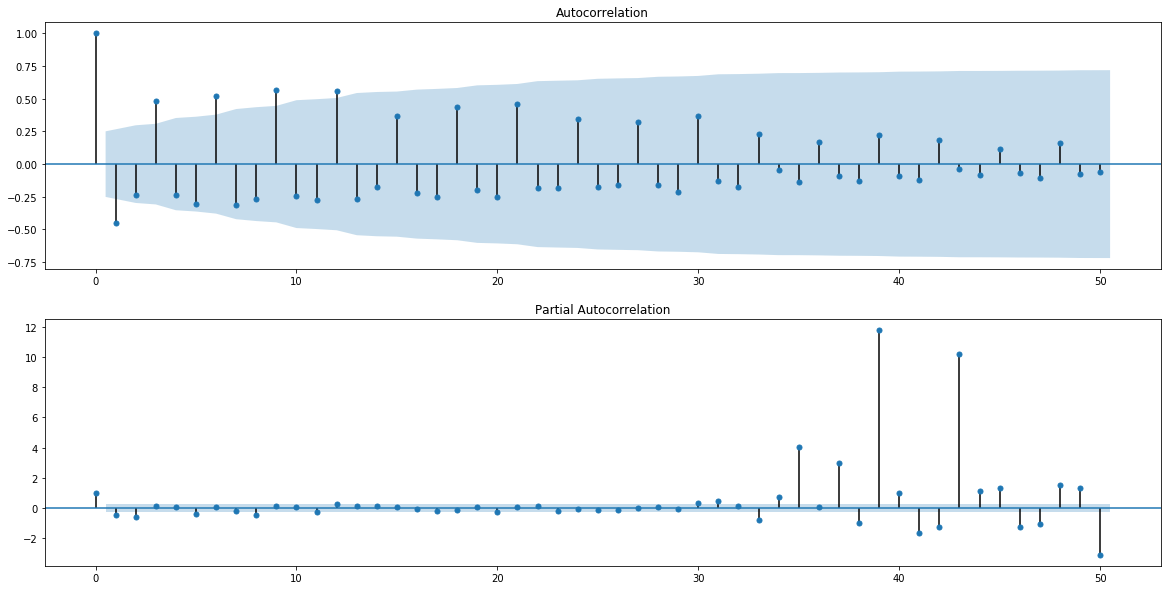

In [22]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [61]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=0, max_ma=2, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (0, 0) is the best.


In [133]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(12,0,4),freq='M',seasonal_order=(0,0,0,0)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  sales   No. Observations:                   62
Model:              SARIMAX(12, 0, 4)   Log Likelihood                -830.021
Date:                Fri, 01 Nov 2019   AIC                           1694.042
Time:                        16:20:57   BIC                           1730.203
Sample:                    02-28-2014   HQIC                          1708.240
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0855      0.267      0.321      0.748      -0.437       0.608
ar.L2         -0.0761      0.269     -0.283      0.777      -0.603       0.451
ar.L3         -0.0988      0.204     -0.485      0.628      -0.498       0.301
ar.L4          0.0492      0.196      0.251      0.802      -0.336       0.434
ar.L5          0.1139      0.158      0.720      0.472      -0.196       0.424
ar.L6          0.1000      0.140      0.715      0.475      -0.174       0.374
ar.L7         -0.1484      0.102     -1.458      0.145      -0.348       0.051
ar.L8         -0.0387      0.122     -0.317      0.751      -0.278       0.201
ar.L9          0.3722      0.126      2.942      0.003       0.124       0.620
ar.L10        -0.0096      0.158     -0.061      0.952      -0.320       0.301
ar.L11         0.0612      0.139      0.439      0.661      -0.212       0.334
ar.L12         0.5871      0.112      5.224      0.000       0.367       0.807
ma.L1          0.1222      0.291      0.420      0.674      -0.448       0.692
ma.L2          0.4254      0.324      1.312      0.190      -0.210       1.061
ma.L3          0.3332      0.265      1.255      0.209      -0.187       0.854
ma.L4          0.1828      0.261      0.699      0.484      -0.330       0.695
sigma2      1.789e+10   5.74e-12   3.12e+21      0.000    1.79e+10    1.79e+10
===================================================================================
Ljung-Box (Q):                       25.37   Jarque-Bera (JB):                 2.04
Prob(Q):                              0.97   Prob(JB):                         0.36
Heteroskedasticity (H):               0.95   Skew:                            -0.32
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+38. Standard errors may be unstable.
"""

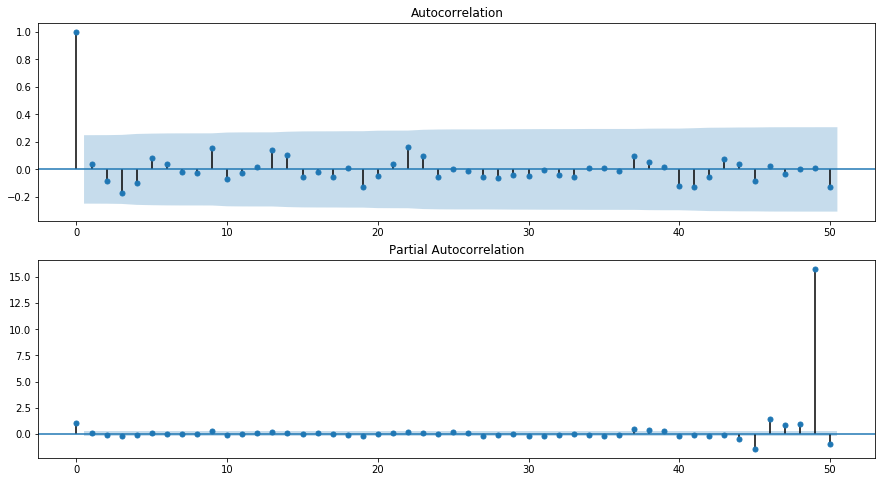

In [121]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:15911240749.055222


In [143]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(12,0,4),seasonal_order=(0,0,0,1),enforce_stationarity=False, enforce_invertibility=False,freq='M').fit()
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  sales   No. Observations:                   62
Model:              SARIMAX(12, 0, 4)   Log Likelihood                -658.153
Date:                Fri, 01 Nov 2019   AIC                           1350.307
Time:                        16:23:17   BIC                           1382.811
Sample:                    02-28-2014   HQIC                          1362.685
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1774      0.240      0.741      0.459      -0.292       0.647
ar.L2          0.0557      0.267      0.209      0.835      -0.467       0.579
ar.L3         -0.0715      0.263     -0.272      0.786      -0.587       0.444
ar.L4         -0.0671      0.210     -0.319      0.749      -0.479       0.344
ar.L5          0.0535      0.148      0.361      0.718      -0.237       0.344
ar.L6          0.1342      0.167      0.805      0.421      -0.192       0.461
ar.L7         -0.1366      0.150     -0.908      0.364      -0.431       0.158
ar.L8          0.0046      0.165      0.028      0.978      -0.320       0.329
ar.L9          0.4561      0.184      2.482      0.013       0.096       0.816
ar.L10        -0.0405      0.202     -0.201      0.841      -0.436       0.354
ar.L11        -0.1231      0.197     -0.624      0.532      -0.510       0.264
ar.L12         0.5912      0.147      4.027      0.000       0.303       0.879
ma.L1         -0.1224      0.278     -0.441      0.660      -0.667       0.422
ma.L2          0.2853      0.330      0.864      0.387      -0.362       0.932
ma.L3          0.2214      0.303      0.731      0.465      -0.372       0.815
ma.L4          0.1645      0.260      0.632      0.528      -0.346       0.675
sigma2      1.789e+10   2.21e-11    8.1e+20      0.000    1.79e+10    1.79e+10
===================================================================================
Ljung-Box (Q):                       24.32   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.98   Prob(JB):                         0.65
Heteroskedasticity (H):               0.99   Skew:                            -0.31
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.51e+36. Standard errors may be unstable.
"""

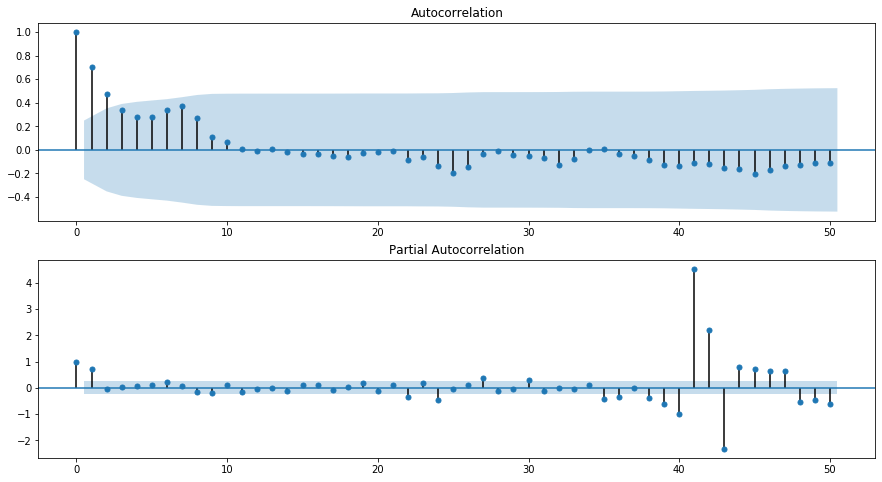

In [145]:
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [144]:
pred = sarima.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMA model MSE:14444905872.420609


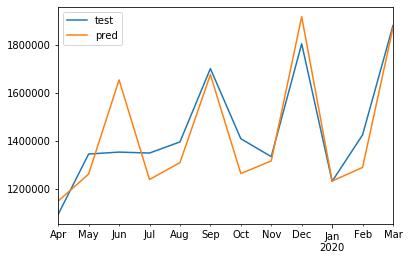

In [146]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()